<a href="https://colab.research.google.com/github/alicepearse/DL_prac/blob/master/Regression_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between (-3, +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])


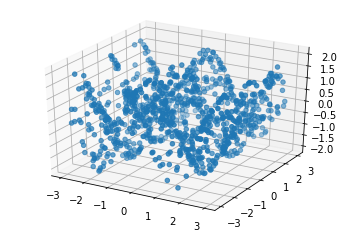

In [3]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
# plt.show()

In [7]:
# Build the model
model = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

In [8]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [9]:
# Train the model
def full_gd(model, criterion, optimizer, X_train, y_train, epochs=1000):
  train_losses = np.zeros(epochs)

  for it in range(epochs):
    optimizer.zero_grad()

    # forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backwards and optimize
    loss.backward()
    optimizer.step()

    # save losses
    train_losses[it] = loss.item()

    if (it + 1) % 50 == 0:
      print(f'Epoch {it+1}/{epochs}, Train Loss: {loss.item():.4f}')

  return train_losses

X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(Y.astype(np.float32).reshape(-1, 1))
train_losses = full_gd(model, criterion, optimizer, X_train, y_train)


Epoch 50/1000, Train Loss: 0.8085
Epoch 100/1000, Train Loss: 0.5456
Epoch 150/1000, Train Loss: 0.3736
Epoch 200/1000, Train Loss: 0.2903
Epoch 250/1000, Train Loss: 0.1895
Epoch 300/1000, Train Loss: 0.0597
Epoch 350/1000, Train Loss: 0.0159
Epoch 400/1000, Train Loss: 0.0064
Epoch 450/1000, Train Loss: 0.0042
Epoch 500/1000, Train Loss: 0.0040
Epoch 550/1000, Train Loss: 0.0024
Epoch 600/1000, Train Loss: 0.0019
Epoch 650/1000, Train Loss: 0.0062
Epoch 700/1000, Train Loss: 0.0016
Epoch 750/1000, Train Loss: 0.0015
Epoch 800/1000, Train Loss: 0.0014
Epoch 850/1000, Train Loss: 0.0018
Epoch 900/1000, Train Loss: 0.0019
Epoch 950/1000, Train Loss: 0.0067
Epoch 1000/1000, Train Loss: 0.0014


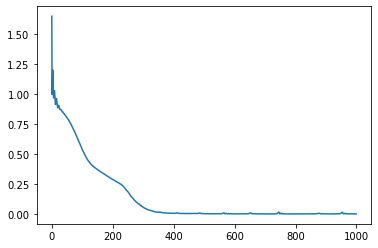

In [10]:
plt.plot(train_losses)

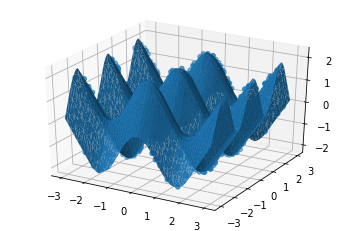

In [11]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
with torch.no_grad():
  line = np.linspace(-3, 3, 50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
  plt.show()